In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
sales = pd.read_excel('Walmart sales.xlsx')
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1


<h1 style="color:orange">
Analyze the performance of sales and revenue at the city and branch level
</h1>

In [65]:
# Calculate total revenue for each transaction 
sales['Total Revenue'] = sales['Unit price'] * sales['Quantity']

Sales Performance at the City and Branch Level:
        City Branch  Total Sales
0   Mandalay      A          119
1   Mandalay      B          118
2   Mandalay      C           95
3  Naypyitaw      A          110
4  Naypyitaw      B          109
5  Naypyitaw      C          109
6     Yangon      A          114
7     Yangon      B          113
8     Yangon      C          113


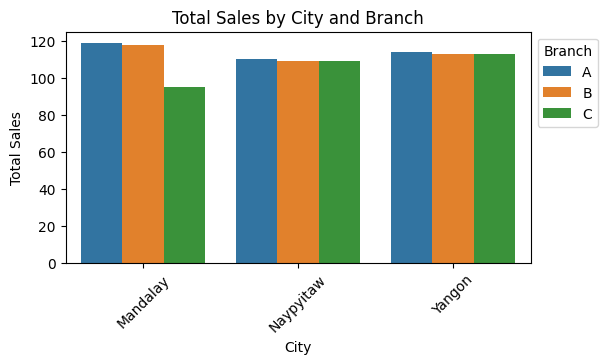

In [66]:
# Sales performance at the city and branch level
sales_performance = sales.groupby(['City', 'Branch']).size().reset_index(name='Total Sales')

print("Sales Performance at the City and Branch Level:")
print(sales_performance)

# Visualize Sales Performance
plt.figure(figsize=(6, 3))
sns.barplot(x='City', y='Total Sales', hue='Branch', data=sales_performance)
plt.title('Total Sales by City and Branch')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Branch', bbox_to_anchor=(1, 1))
plt.show()


Revenue Performance at the City and Branch Level:
        City Branch  Total Revenue
0   Mandalay      A       34130.09
1   Mandalay      B       37215.93
2   Mandalay      C       29794.62
3  Naypyitaw      A       35985.64
4  Naypyitaw      B       35157.75
5  Naypyitaw      C       34160.14
6     Yangon      A       33647.27
7     Yangon      B       35193.51
8     Yangon      C       32302.43


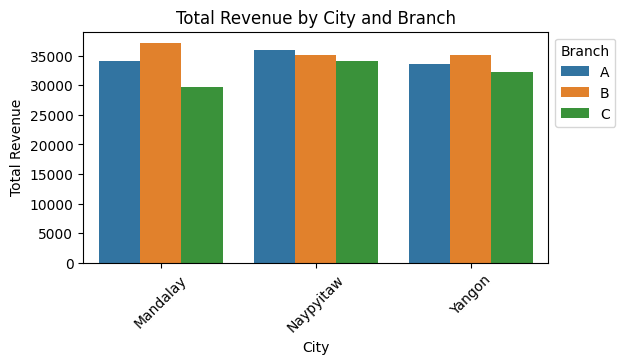

In [67]:
# Total revenue at the city and branch level
revenue_performance = sales.groupby(['City', 'Branch'])['Total Revenue'].sum().reset_index(name='Total Revenue')


print("\nRevenue Performance at the City and Branch Level:")
print(revenue_performance)

# Visualize Revenue Performance
plt.figure(figsize=(6, 3))
sns.barplot(x='City', y='Total Revenue', hue='Branch', data=revenue_performance)
plt.title('Total Revenue by City and Branch')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Branch', bbox_to_anchor=(1, 1))
plt.show()


Average Revenue per Transaction at the City and Branch Level:
        City Branch  Average Revenue
0   Mandalay      A       286.807479
1   Mandalay      B       315.389237
2   Mandalay      C       313.627579
3  Naypyitaw      A       327.142182
4  Naypyitaw      B       322.548165
5  Naypyitaw      C       313.395780
6     Yangon      A       295.151491
7     Yangon      B       311.446991
8     Yangon      C       285.862212


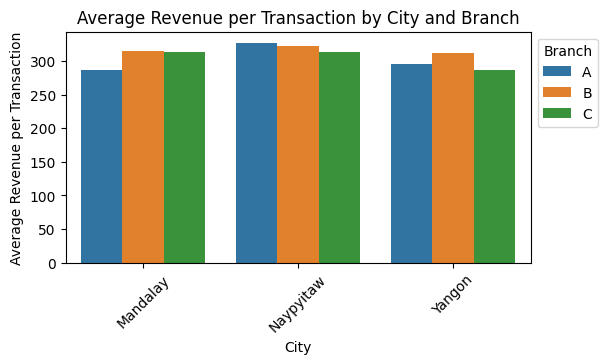

In [68]:
# Average revenue per transaction at the city and branch level
average_revenue = sales.groupby(['City', 'Branch'])['Total Revenue'].mean().reset_index(name='Average Revenue')

print("\nAverage Revenue per Transaction at the City and Branch Level:")
print(average_revenue)


# Visualize Average Revenue per Transaction
plt.figure(figsize=(6, 3))
sns.barplot(x='City', y='Average Revenue', hue='Branch', data=average_revenue)
plt.title('Average Revenue per Transaction by City and Branch')
plt.xlabel('City')
plt.ylabel('Average Revenue per Transaction')
plt.xticks(rotation=45)
plt.legend(title='Branch', bbox_to_anchor=(1, 1))
plt.show()

<h1 style="color:orange">
What is the average price of an item sold at each branch of the city
</h1>

Average Price of an Item Sold at Each Branch of the City:
        City Branch  Average Price
0   Mandalay      A      53.353866
1   Mandalay      B      56.133305
2   Mandalay      C      57.958316
3  Naypyitaw      A      54.123182
4  Naypyitaw      B      57.785688
5  Naypyitaw      C      57.941009
6     Yangon      A      55.639298
7     Yangon      B      56.011062
8     Yangon      C      52.684602


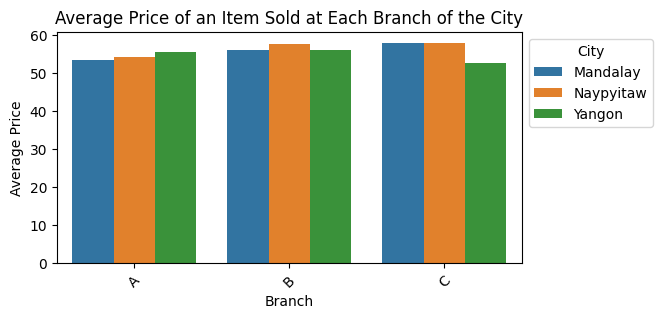

In [69]:
# Calculate the average price of an item sold at each branch of the city
average_price_per_branch = sales.groupby(['City', 'Branch'])['Unit price'].mean().reset_index(name='Average Price')

# Print or visualize the results
print("Average Price of an Item Sold at Each Branch of the City:")
print(average_price_per_branch)

# Visualize the Average Price per Branch
plt.figure(figsize=(6, 3))
sns.barplot(x='Branch', y='Average Price', hue='City', data=average_price_per_branch)
plt.title('Average Price of an Item Sold at Each Branch of the City')
plt.xlabel('Branch')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.show()

<h1 style="color:orange">
Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.
</h1>

In [70]:
# Ensure 'Date' column is in datetime format
sales['Date'] = pd.to_datetime(sales['Date'], format='%m/%d/%Y')

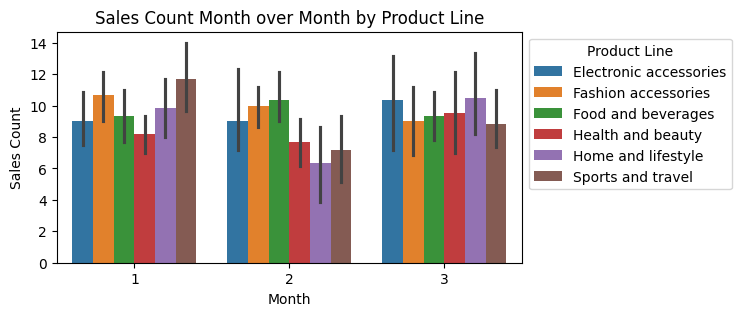

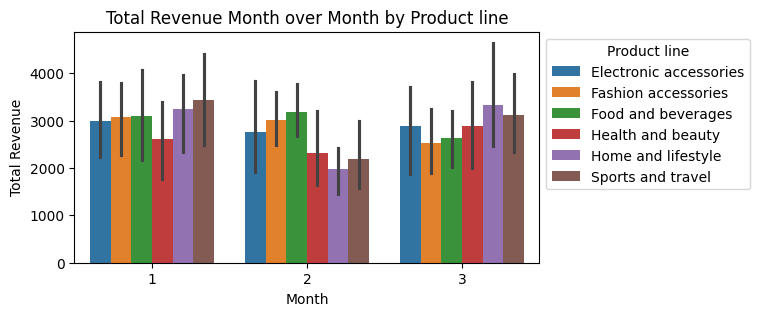

In [71]:
# Sales count month over month
sales['Month'] = sales['Date'].dt.month
sales['Year'] = sales['Date'].dt.year

# Total revenue month over month
monthly_performance = sales.groupby(['Year', 'Month', 'Product line', 'Gender', 'Payment']) \
    .agg({'Invoice ID': 'count', 'Total Revenue': 'sum'}) \
    .reset_index()


# Sales count month over month
plt.figure(figsize=(6, 3))
sns.barplot(x='Month', y='Invoice ID', hue='Product line', data=monthly_performance)
plt.title('Sales Count Month over Month by Product Line')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend(title='Product Line', bbox_to_anchor=(1, 1))
plt.show()


# Total revenue month over month
plt.figure(figsize=(6, 3))
sns.barplot(x='Month', y='Total Revenue', hue='Product line', data=monthly_performance)
plt.title('Total Revenue Month over Month by Product line')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Product line', bbox_to_anchor=(1, 1))
plt.show()

Focus Areas for April 2019:
     Year  Month            Product line  Gender      Payment  Invoice ID  \
0    2019      1  Electronic accessories  Female         Cash           9   
1    2019      1  Electronic accessories  Female  Credit card           7   
2    2019      1  Electronic accessories  Female      Ewallet           7   
3    2019      1  Electronic accessories    Male         Cash          10   
4    2019      1  Electronic accessories    Male  Credit card           8   
..    ...    ...                     ...     ...          ...         ...   
103  2019      3       Sports and travel  Female  Credit card           9   
104  2019      3       Sports and travel  Female      Ewallet           8   
105  2019      3       Sports and travel    Male         Cash           8   
106  2019      3       Sports and travel    Male  Credit card           8   
107  2019      3       Sports and travel    Male      Ewallet          14   

     Total Revenue  
0          2731.86  
1    

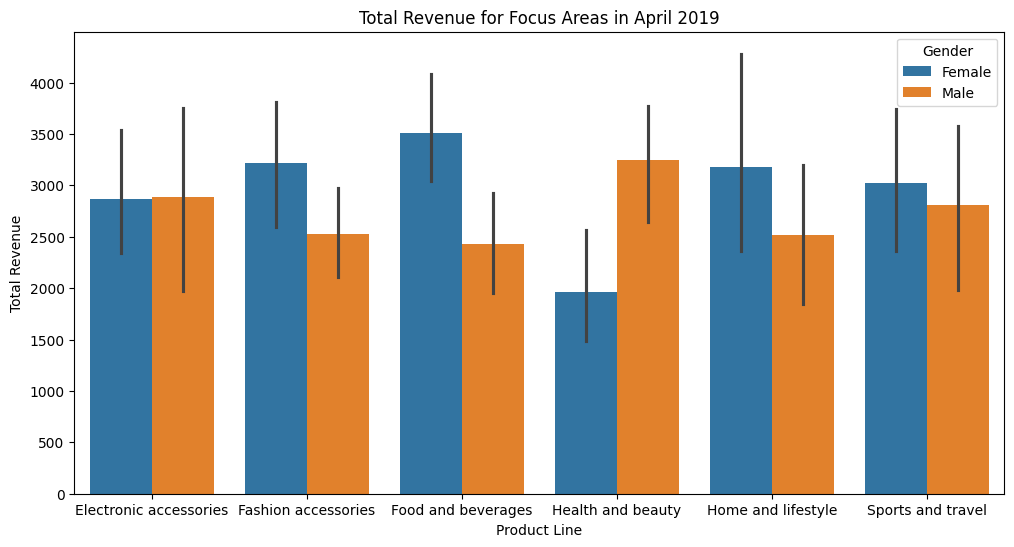

In [72]:
# Filter data for April 2019 & Identify focus areas for April 2019
april_2019_data = monthly_performance[(monthly_performance['Month'] == 4) & (monthly_performance['Year'] == 2019)]

focus_areas = april_2019_data.groupby(['Product line', 'Gender', 'Payment']).sum().reset_index()
focus_areas = monthly_performance.groupby(['Year', 'Month', 'Product line', 'Gender', 'Payment']).sum().reset_index()

print("Focus Areas for April 2019:")
print(focus_areas)

plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total Revenue', hue='Gender', data=focus_areas)
plt.title('Total Revenue for Focus Areas in April 2019')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.show()